<a href="https://colab.research.google.com/github/faizantanveeer/tesla-stock-price-prediction/blob/main/Tesla_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
tesla_df = pd.read_csv('tesla.csv')
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [50]:
print(tesla_df['Date'].min())
print(tesla_df['Date'].max())

01-02-2011
31-12-2018


In [3]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [4]:
tesla_df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [46]:
tesla_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
tesla_df.duplicated().any()

False

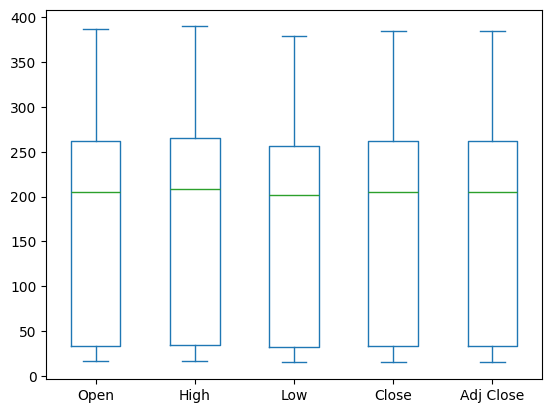

In [6]:
tesla_df[['Open','High', 'Low', 'Close', 'Adj Close']].plot(kind = 'box')
plt.show()

In [7]:
!pip install plotly==5.15.0

In [8]:
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

init_notebook_mode(connected=True)

In [57]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df['Date'].dtype

dtype('<M8[ns]')

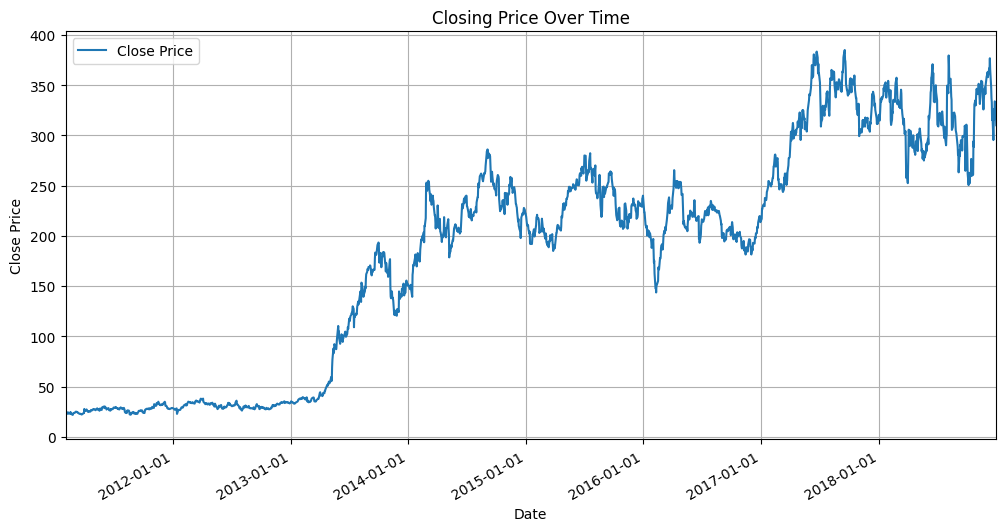

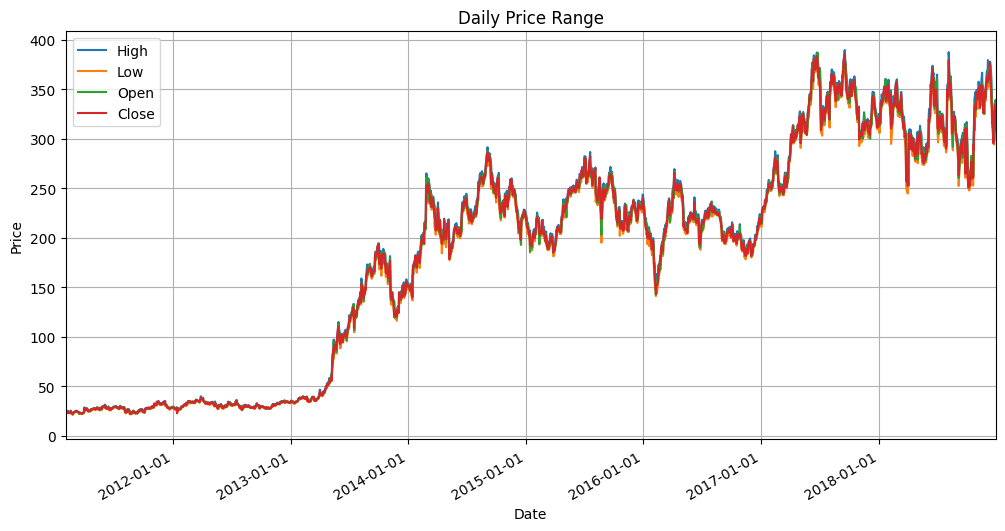

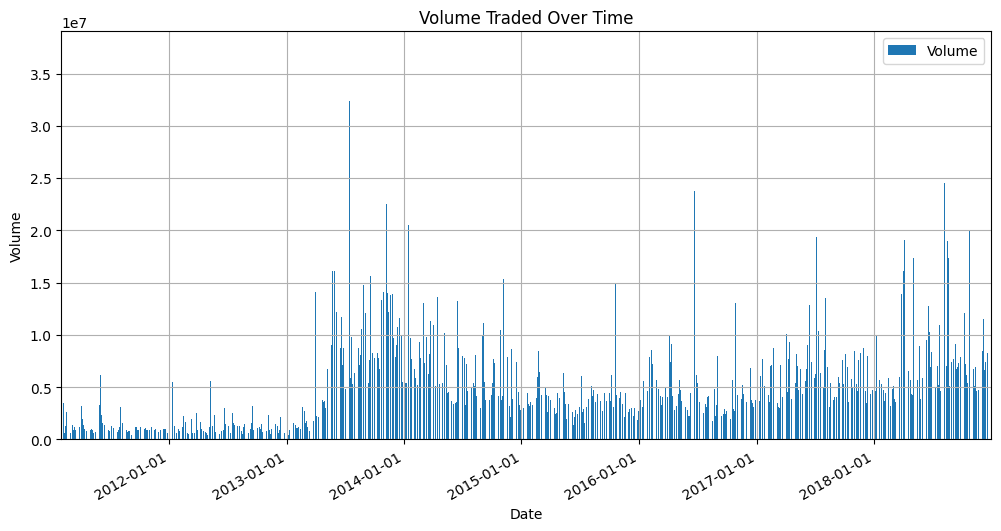

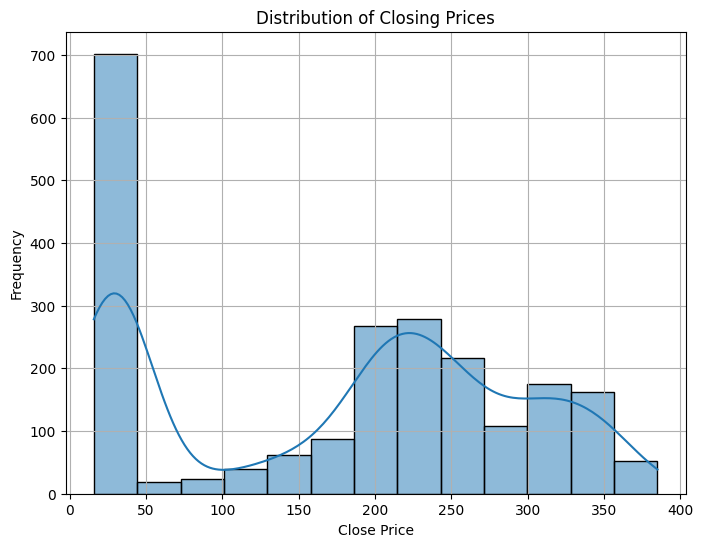

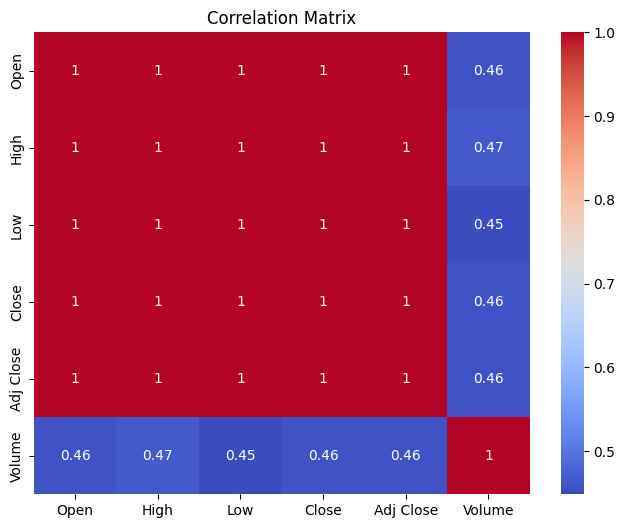

In [61]:
min_date = pd.to_datetime('01-02-2011', format='%d-%m-%Y')  # Adjust format if needed
max_date = pd.to_datetime('31-12-2018', format='%d-%m-%Y')  # Adjust format if needed


# 1. Time Series Plot of Closing Price
plt.figure(figsize=(12, 6))
plt.plot(tesla_df['Date'], tesla_df['Close'], label='Close Price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.grid(True)
plt.xlim(min_date, max_date)
plt.show()

# 2. Daily Price Range (High, Low, Open, Close)
plt.figure(figsize=(12, 6))
plt.plot(tesla_df['Date'], tesla_df['High'], label='High')
plt.plot(tesla_df['Date'], tesla_df['Low'], label='Low')
plt.plot(tesla_df['Date'], tesla_df['Open'], label='Open')
plt.plot(tesla_df['Date'], tesla_df['Close'], label='Close')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Range')
plt.legend()
plt.grid(True)
plt.xlim(min_date, max_date)
plt.show()

# 3. Volume Traded
plt.figure(figsize=(12, 6))
plt.bar(tesla_df['Date'], tesla_df['Volume'], label='Volume')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Traded Over Time')
plt.legend()
plt.grid(True)
plt.xlim(min_date, max_date)
plt.show()

# 4. Distribution of Closing Prices
plt.figure(figsize=(8, 6))
sns.histplot(tesla_df['Close'], kde=True)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.grid(True)
plt.show()

# 5. Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(tesla_df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

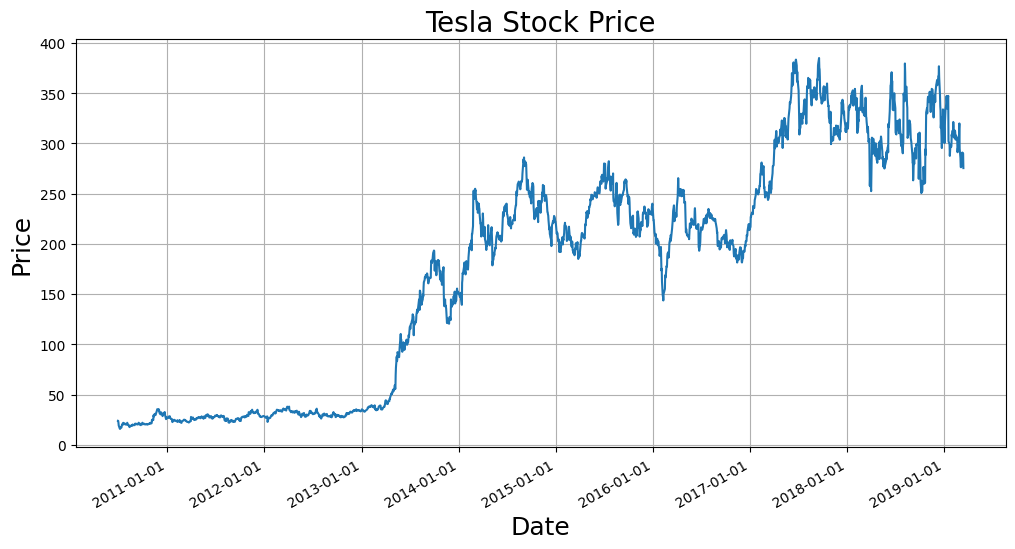

In [59]:
import matplotlib.dates as mdates


plt.figure(figsize=(12, 6))  # Adjust figure size as needed

plt.plot(tesla_df['Date'], tesla_df['Close'])  # Plot Date vs. Close price

# Format x-axis to display dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Adjust date format as needed
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)
plt.title('Tesla Stock Price', fontsize=20)

plt.grid(True)  # Add gridlines (optional)

plt.show()

In [11]:
X = np.array(tesla_df.index).reshape(-1,1)
y = tesla_df['Close']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler().fit(train_X)

In [13]:
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

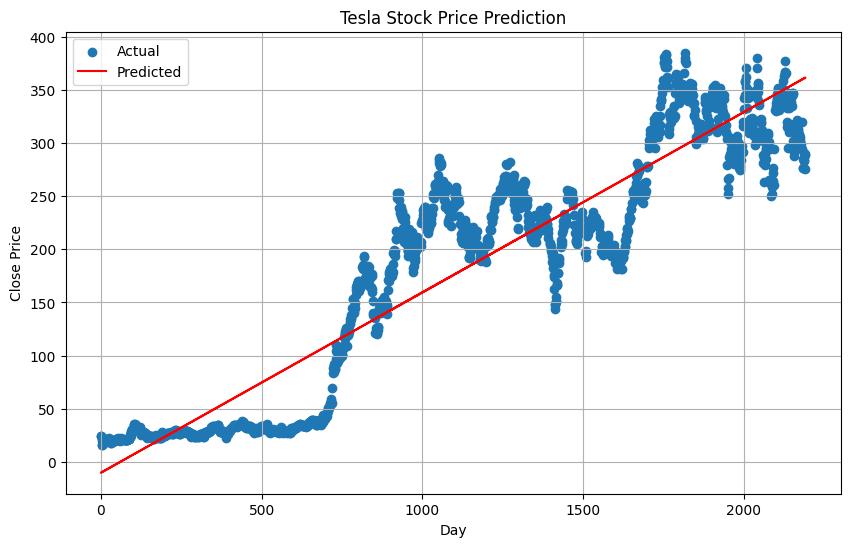

In [60]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed


# Scatter plot for actual values
plt.scatter(train_X.T[0], train_y, marker='o', label='Actual')

# Line plot for predicted values
plt.plot(train_X.T[0], model.predict(train_X).T, linestyle='-', label='Predicted', color = 'red')

plt.xlabel('Day')  # X-axis label
plt.ylabel('Close Price')  # Y-axis label (assuming 'Close' is your target variable)
plt.title('Tesla Stock Price Prediction')  # Title
plt.legend()  # Show legend

plt.grid(True)  # Add gridlines (optional)

plt.show()  # Display the plot

In [45]:
print(f'MSE: {mean_squared_error(test_y, model.predict(test_X))}')
print(f'MAE: {mean_absolute_error(test_y, model.predict(test_X))}')
print(f'R2: {r2_score(test_y, model.predict(test_X))}')

MSE: 1792.654029504681
MAE: 34.75994972752055
R2: 0.8654369793893891


In [64]:
model_name=[]
r2score=[]
rmse=[]
models=[
    GradientBoostingRegressor(random_state=42),
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    ExtraTreesRegressor(random_state=42),
    AdaBoostRegressor(random_state=42),
    DecisionTreeRegressor(random_state=42),
    XGBRegressor(random_state=42),
    XGBRFRegressor(random_state=42)
]

for model in models:
    model.fit(train_X , train_y)
    y_pred = model.predict(test_X)
    model_name.append(model.__class__.__name__)
    r2score.append(str(r2_score( test_y , y_pred ) * 100 ))
    rmse.append(str(mean_squared_error( test_y , y_pred,squared=False )))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/usr/local/lib/pytho

In [65]:
models_df = pd.DataFrame({"Model-Name":model_name, "R2_score": r2score ,'RMSE':rmse})
models_df = models_df.astype({"R2_score": float, "RMSE": float})
models_df = models_df.sort_values(by = "R2_score", ascending = False)

In [66]:
models_df

,Model-Name,R2_score,RMSE
4,ExtraTreesRegressor,99.820198,4.894210
2,RandomForestRegressor,99.804006,5.109837
6,DecisionTreeRegressor,99.697877,6.344203
7,XGBRegressor,99.580326,7.477239
0,GradientBoostingRegressor,99.324467,9.486555
8,XGBRFRegressor,98.459413,14.326119
5,AdaBoostRegressor,97.464851,18.377529
1,SVR,91.678220,33.296109
3,LinearRegression,86.543698,42.339745
